In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import statsmodels.api as sm
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier,VotingClassifier
from lightgbm import LGBMClassifier

In [5]:
# reading data

df = pd.read_csv('credit_card.csv')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# converting column names in lower case

df.columns = map(str.lower, df.columns)
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [8]:
df2 = df.copy()

In [9]:
df2.head(2)

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [10]:
# droping id col(irrelevant)

df2.drop('id',axis=1,inplace=True)

In [54]:
## Checking Null Values

for i in df2.columns:
    if df[i].isnull().sum()>0:
        print(i,' has null values.' )
    else:
        print(i,'has no null values.')

limit_bal has no null values.
sex has no null values.
education has no null values.
marriage has no null values.
age has no null values.
pay_1 has no null values.
pay_2 has no null values.
pay_3 has no null values.
pay_4 has no null values.
pay_5 has no null values.
pay_6 has no null values.
bill_amt1 has no null values.
bill_amt2 has no null values.
bill_amt3 has no null values.
bill_amt4 has no null values.
bill_amt5 has no null values.
bill_amt6 has no null values.
pay_amt1 has no null values.
pay_amt2 has no null values.
pay_amt3 has no null values.
pay_amt4 has no null values.
pay_amt5 has no null values.
pay_amt6 has no null values.
default has no null values.


0    77.88
1    22.12
Name: default, dtype: float64


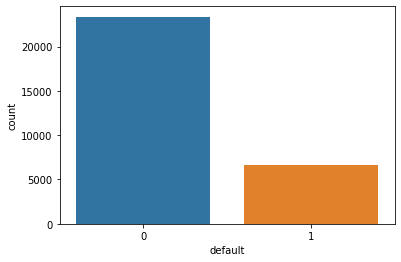

In [59]:
# Checking Imbalance in the Target Column

print(df['default'].value_counts(normalize=True)*100)

sns.countplot(x='default',data=df2)
plt.show()

**Non-defaulters are 77.88% and Defaulters are 22.12% of the whole data.**
**Partial Imbalance**

In [11]:
# as we can see there are values in these columns whose decription is not provided

print(df2.marriage.value_counts())
print(df2.sex.value_counts())
print(df2.education.value_counts())

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64
2    18112
1    11888
Name: sex, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64


In [12]:
# replacing not specified values in others category

df2['education']  = df2['education'].apply(lambda x:x if (x>0 and x<4) else 4)
df2['marriage'] = df2['marriage'].apply(lambda x:x if (x>0 and x<3) else 3)

In [13]:
print(df2.marriage.value_counts())
print(df2.sex.value_counts())
print(df2.education.value_counts())

2    15964
1    13659
3      377
Name: marriage, dtype: int64
2    18112
1    11888
Name: sex, dtype: int64
2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64


In [18]:
# before applying get dummies replacing encoded value by string value

df2['sex'].replace({2:'female',1:'male'},inplace=True)
df2['education'].replace({1:'grad_school',2:'university',3:'high_sch',4:'others'},inplace=True)
df2['marriage'].replace({1:'married',2:'single',3:'others'},inplace=True)

In [19]:
print(df2.marriage.value_counts())
print(df2.sex.value_counts())
print(df2.education.value_counts())

single     15964
married    13659
others       377
Name: marriage, dtype: int64
female    18112
male      11888
Name: sex, dtype: int64
university     14030
grad school    10585
high_sch        4917
others           468
Name: education, dtype: int64


# EDA

**1. SEX Column**

female    60.373333
male      39.626667
Name: sex, dtype: float64


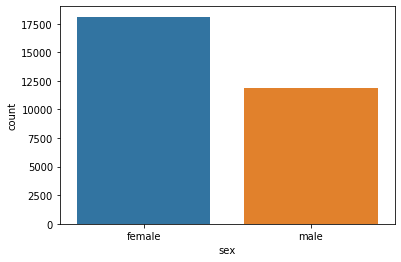

In [57]:
print(df2['sex'].value_counts(normalize=True)*100)
sns.countplot(x='sex',data=df2)

plt.show()


female    56.705847
male      43.294153
Name: sex, dtype: float64


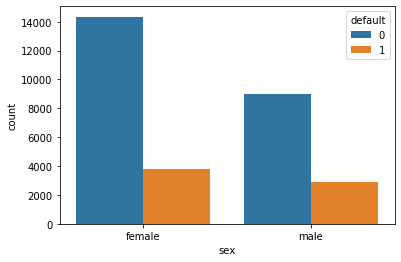

In [56]:
print(df2[df2['default']==1]['sex'].value_counts(normalize=True)*100) 

sns.countplot(x='sex', hue = 'default',data=df2)

plt.show()

**2. EDUCATION Column**

university     46.766667
grad school    35.283333
high_sch       16.390000
others          1.560000
Name: education, dtype: float64


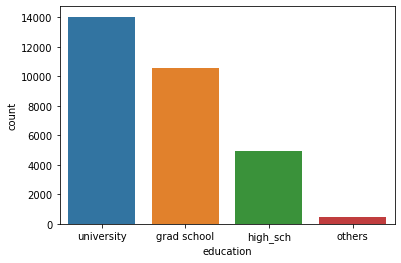

In [33]:
print(df2['education'].value_counts(normalize=True)*100)

sns.countplot(x='education',data=df2)

plt.show()

university     50.180832
grad school    30.681133
high_sch       18.640747
others          0.497288
Name: education, dtype: float64


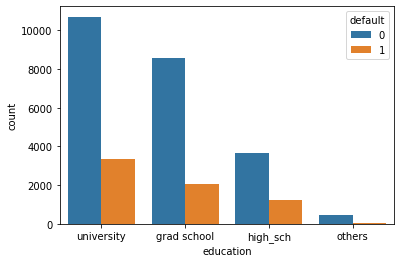

In [35]:
print(df2[df2['default']==1]['education'].value_counts(normalize=True)*100)

sns.countplot(x='education', hue = 'default',data=df2)

plt.show()

**4. MARRIAGE Column**


single     53.213333
married    45.530000
others      1.256667
Name: marriage, dtype: float64


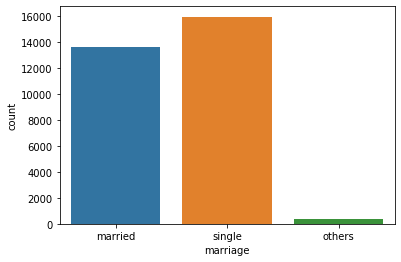

In [38]:
print(df2['marriage'].value_counts(normalize=True)*100)

sns.countplot(x='marriage',data=df2)

plt.show()

single     50.346594
married    48.312236
others      1.341169
Name: marriage, dtype: float64


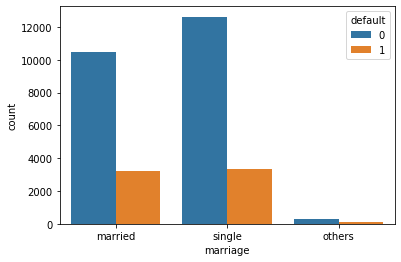

In [39]:
print(df2[df2['default']==1]['marriage'].value_counts(normalize=True)*100)

sns.countplot(x='marriage', hue = 'default',data=df2)

plt.show()

**3. AGE Column**

Mean age of the sample:  35.4855
Median age of the sample:  34.0
Mode of the sample:  29


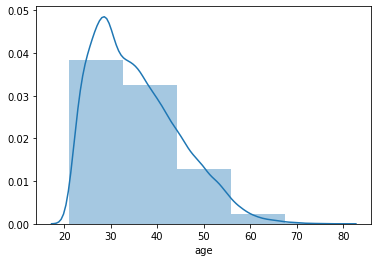

In [52]:
print('Mean age of the sample: ',df2['age'].mean())
print('Median age of the sample: ',df2['age'].median())
print('Mode of the sample: ',df2['age'].mode()[0])


sns.distplot(df2['age'],bins=5)
plt.show()

**4. REPAYMENT STATUS Columns**


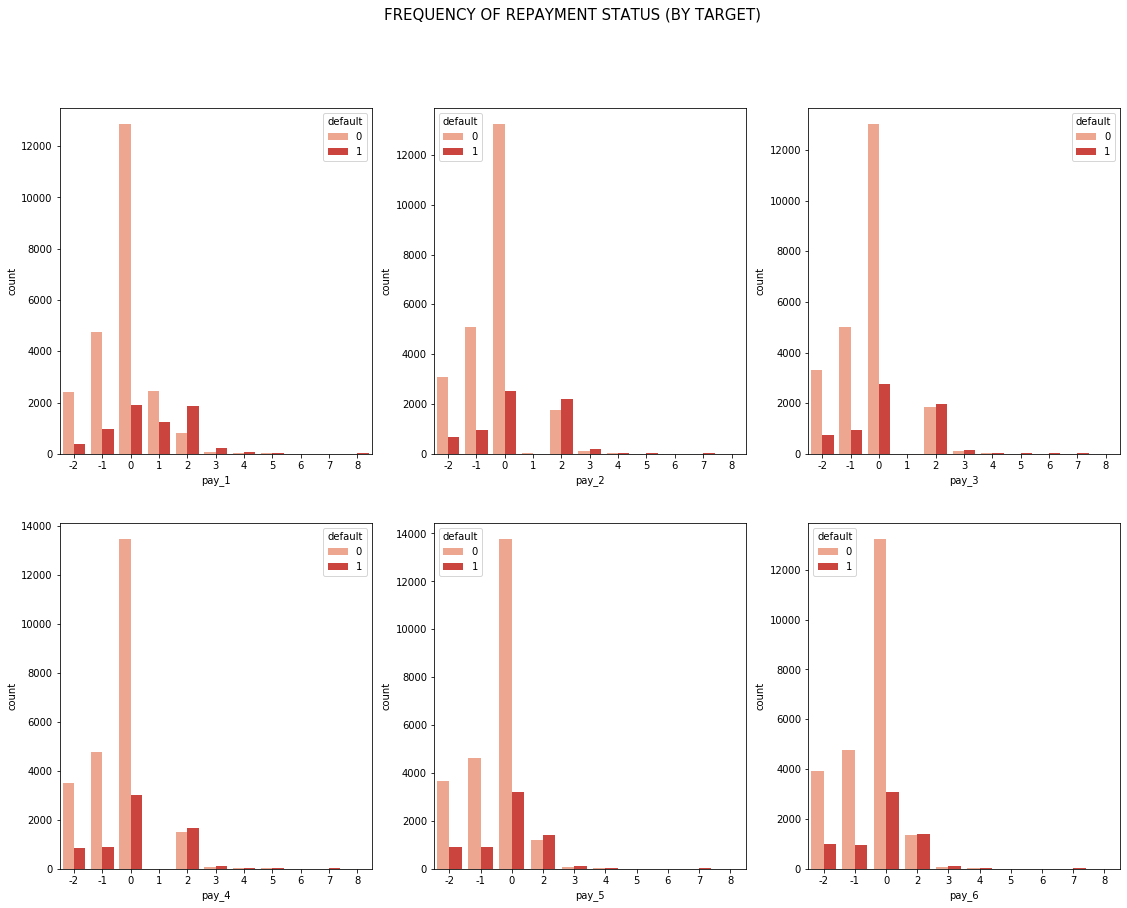

In [53]:
f, axes = plt.subplots(2, 3, figsize=(19,14), facecolor='white')
f.suptitle("FREQUENCY OF REPAYMENT STATUS (BY TARGET)",size=15)
ax1 = sns.countplot(x='pay_1', hue = 'default', data=df2, palette='Reds', ax=axes[0,0])
ax2 = sns.countplot(x='pay_2', hue = 'default', data=df2, palette='Reds', ax=axes[0,1])
ax3 = sns.countplot(x='pay_3', hue = 'default', data=df2, palette='Reds', ax=axes[0,2])
ax4 = sns.countplot(x='pay_4', hue = 'default', data=df2, palette='Reds', ax=axes[1,0])
ax5 = sns.countplot(x='pay_5', hue = 'default', data=df2, palette='Reds', ax=axes[1,1])
ax6 = sns.countplot(x='pay_6', hue = 'default', data=df2, palette='Reds', ax=axes[1,2])

**Checking correlation between Bill_Amt**


           bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  bill_amt6
bill_amt1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650
bill_amt2   0.951484   1.000000   0.928326   0.892482   0.859778   0.831594
bill_amt3   0.892279   0.928326   1.000000   0.923969   0.883910   0.853320
bill_amt4   0.860272   0.892482   0.923969   1.000000   0.940134   0.900941
bill_amt5   0.829779   0.859778   0.883910   0.940134   1.000000   0.946197
bill_amt6   0.802650   0.831594   0.853320   0.900941   0.946197   1.000000


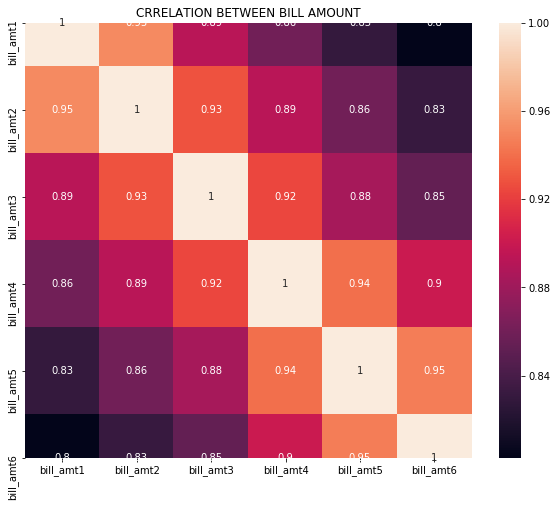

In [42]:
corr_bill_amt = df2[['bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].corr()
print(corr_bill_amt)
plt.figure(figsize=(10,8))
sns.heatmap(corr_bill_amt,annot=True)
plt.title('CRRELATION BETWEEN BILL AMOUNT')
plt.show()

**Checking correlation between Pay_Amt**

          pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6
pay_amt1  1.000000  0.285576  0.252191  0.199558  0.148459  0.185735
pay_amt2  0.285576  1.000000  0.244770  0.180107  0.180908  0.157634
pay_amt3  0.252191  0.244770  1.000000  0.216325  0.159214  0.162740
pay_amt4  0.199558  0.180107  0.216325  1.000000  0.151830  0.157834
pay_amt5  0.148459  0.180908  0.159214  0.151830  1.000000  0.154896
pay_amt6  0.185735  0.157634  0.162740  0.157834  0.154896  1.000000


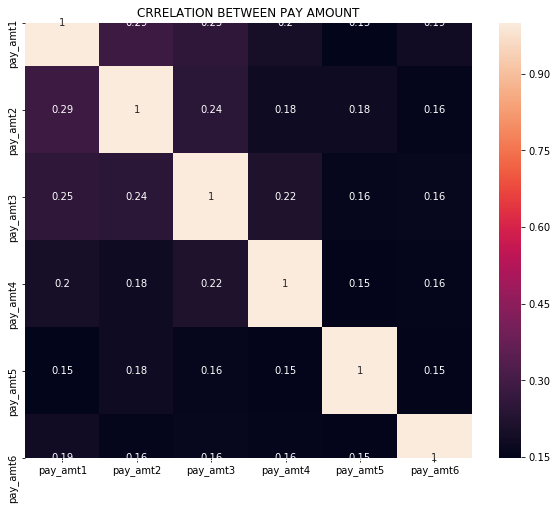

In [41]:
corr_pay_amt = df2[['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].corr()
print(corr_pay_amt)

plt.figure(figsize=(10,8))
sns.heatmap(corr_pay_amt,annot=True)
plt.title('CRRELATION BETWEEN PAY AMOUNT')

plt.show()

**Checking correlation between Pay (Repayment Status)**


          pay_1     pay_2     pay_3     pay_4     pay_5     pay_6
pay_1  1.000000  0.672164  0.574245  0.538841  0.509426  0.474553
pay_2  0.672164  1.000000  0.766552  0.662067  0.622780  0.575501
pay_3  0.574245  0.766552  1.000000  0.777359  0.686775  0.632684
pay_4  0.538841  0.662067  0.777359  1.000000  0.819835  0.716449
pay_5  0.509426  0.622780  0.686775  0.819835  1.000000  0.816900
pay_6  0.474553  0.575501  0.632684  0.716449  0.816900  1.000000


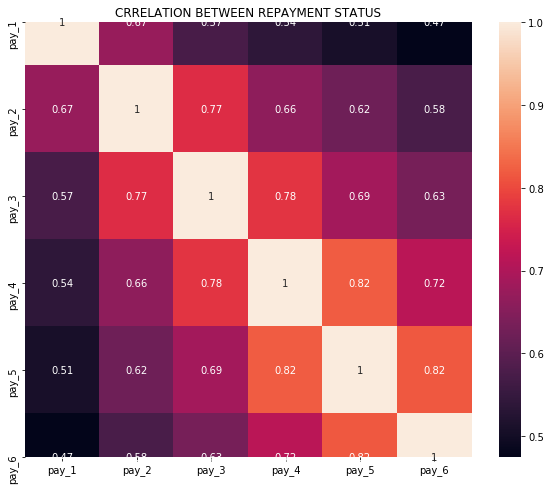

In [44]:
corr_bill_amt = df[['pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].corr()
print(corr_bill_amt)

plt.figure(figsize=(10,8))
sns.heatmap(corr_bill_amt,annot=True)
plt.title('CRRELATION BETWEEN REPAYMENT STATUS')
plt.show()

In [16]:
# apply get dummies on sex, marriage and education columns

df2=pd.get_dummies(df2,columns=['sex',"marriage","education"],drop_first=True)

In [17]:
df2.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default', 'sex_m',
       'marriage_others', 'marriage_single', 'education_high_sch',
       'education_others', 'education_uni'],
      dtype='object')

# User Define Functions

In [18]:
# user define function for eval metrics 

def eval_metrics(algo,xtest,ytest): 
    y_test_pred = algo.predict(xtest)
    y_test_prob = algo.predict_proba(xtest)[:,1]
    print('Test Data')
    print('Confusion Matrix:\n', confusion_matrix(ytest,y_test_pred))
    print('Accuracy of Test:', accuracy_score(ytest,y_test_pred))
    print('AUC of Test:', roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test:\n',classification_report(ytest,y_test_pred))

In [19]:
# user define function for min bias and min variance error from cv_results_ dataframe of gridsearchcv of every algorithm
# and there repective parameters


def bias_var_error(grid_df):
    print('Minimum Bias')
    print('Using this',grid_df[grid_df['mean_test_score']==grid_df['mean_test_score'].max()]['params'].values)
    print('Accuracy is:',grid_df[grid_df['mean_test_score']==grid_df['mean_test_score'].max()]['mean_test_score'].values)
    print('Bias Error is:',(1-grid_df[grid_df['mean_test_score']==grid_df['mean_test_score'].max()]['mean_test_score'].values))
    print('Variance Error is:',grid_df[grid_df['mean_test_score']==grid_df['mean_test_score'].max()]['std_test_score'].values**2)
    print('\n')
    
    print('Minimum Variance')
    print('Using this',grid_df[grid_df['std_test_score']==grid_df['std_test_score'].min()]['params'].values)
    print('Accuracy is:',grid_df[grid_df['std_test_score']==grid_df['std_test_score'].min()]['mean_test_score'].values)
    print('Bias Error is:',(1-grid_df[grid_df['std_test_score']==grid_df['std_test_score'].min()]['mean_test_score'].values))
    print('Variance Error is:',grid_df[grid_df['std_test_score']==grid_df['std_test_score'].min()]['std_test_score'].values**2)


# Comparing accuracy of different models using cross validation

In [20]:
X = df2.drop('default',axis=1)
y = df2.default

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [22]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**Keeping all models in one list**

In [98]:
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Gaussian Naive Bayes',GaussianNB()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Gradient Boost',GradientBoostingClassifier()))
models.append(('Light GBM',LGBMClassifier()))
models.append(('Ada Boost',AdaBoostClassifier()))
models.append(('Bagging Classifier',BaggingClassifier()))

In [99]:
# Evaluating Each model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
accuracy = []
bias_error = []
var_error = []
for name,model in models:
    fold=KFold(shuffle=True,n_splits=10,random_state=1)
    if name == 'Logistic Regression'or name == 'KNN' or name == 'Naive Bayes':
        result=cross_val_score(model,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
    else:
        result=cross_val_score(model,X_train,y_train,cv=fold,scoring='roc_auc')
    predictions.append(result)
    names.append(name)
    accuracy.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [100]:
acc_df = pd.DataFrame({'Accuracy':accuracy,'Bias Error':bias_error,'Variance Error':var_error},index=names)

acc_df

,Accuracy,Bias Error,Variance Error
Logistic Regression,0.724453,0.275547,0.000189
KNN,0.693980,0.306020,0.000127
Gaussian Naive Bayes,0.730891,0.269109,0.000145
Decision Tree,0.609012,0.390988,0.000098
Random Forest,0.760098,0.239902,0.000097
Gradient Boost,0.780552,0.219448,0.000142
Light GBM,0.776536,0.223464,0.000127
Ada Boost,0.773026,0.226974,0.000135
Bagging Classifier,0.727116,0.272884,0.000035


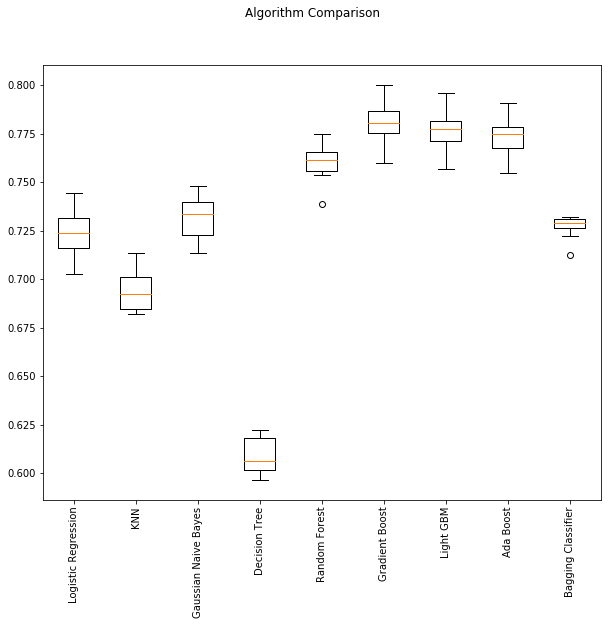

In [101]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(predictions)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

# Hyperparameter Tuning of each model

In [20]:
X = df2.drop('default',axis=1)
y = df2.default

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [22]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Logistic Regression

**Grid Search CV**

In [24]:
lr = LogisticRegression(random_state=1,solver='liblinear',class_weight='balanced')

lr_params = {'penalty':['l1','l2'],'C':[1.0,0.1,0.01,0.001,0.0001]}

In [25]:
fold=KFold(shuffle=True,n_splits=5,random_state=1)

gs_lr = GridSearchCV(lr,lr_params,cv=fold,scoring='roc_auc')

In [26]:
gs_lr.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [27]:
lr_cv = pd.DataFrame(gs_lr.cv_results_)

bias_var_error(lr_cv)

Minimum Bias
Using this [{'C': 1.0, 'penalty': 'l1'}]
Accuracy is: [0.72476381]
Bias Error is: [0.27523619]
Variance Error is: [0.00010421]


Minimum Variance
Using this [{'C': 0.0001, 'penalty': 'l1'}]
Accuracy is: [0.5]
Bias Error is: [0.5]
Variance Error is: [0.]


# KNN Classifier

In [31]:
knn=KNeighborsClassifier()

knn_params={'n_neighbors':np.arange(3,100),'weights':['uniform','distance'],'metric':['minkowski','manhattan','euclidean']}

**RandomizedSearchCV**

In [65]:
rs_knn = RandomizedSearchCV(knn,knn_params,cv=fold,scoring='roc_auc',random_state=1)

rs_knn.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'metric': ['minkowski', 'manhattan',
                                                   'euclidean'],
                                        'n_neighbor...
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6

In [66]:
knn_cv = pd.DataFrame(rs_knn.cv_results_)

bias_var_error(knn_cv)

Minimum Bias
Using this [{'weights': 'uniform', 'n_neighbors': 93, 'metric': 'euclidean'}]
Accuracy is: [0.74742744]
Bias Error is: [0.25257256]
Variance Error is: [9.36123541e-05]


Minimum Variance
Using this [{'weights': 'distance', 'n_neighbors': 39, 'metric': 'manhattan'}]
Accuracy is: [0.74391748]
Bias Error is: [0.25608252]
Variance Error is: [5.04158327e-05]


**GridSearchCV**

In [49]:
knn=KNeighborsClassifier()

knn_params={'n_neighbors':np.arange(80,110),'weights':['uniform','distance'],'metric':['minkowski','manhattan','euclidean']}

In [50]:
gs_knn = GridSearchCV(knn,knn_params,cv=fold,scoring='roc_auc')

gs_knn.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [51]:
knn_cv = pd.DataFrame(gs_knn.cv_results_)

bias_var_error(knn_cv)

Minimum Bias
Using this [{'metric': 'manhattan', 'n_neighbors': 104, 'weights': 'uniform'}]
Accuracy is: [0.7538045]
Bias Error is: [0.2461955]
Variance Error is: [6.93368351e-05]


Minimum Variance
Using this [{'metric': 'manhattan', 'n_neighbors': 80, 'weights': 'distance'}]
Accuracy is: [0.7496355]
Bias Error is: [0.2503645]
Variance Error is: [4.82152234e-05]


# Decision Tree

In [74]:
dt = DecisionTreeClassifier(random_state=1,class_weight='balanced')

dt_params = {'max_depth':np.arange(5,50),
         'min_samples_split':np.arange(2,50),
         'min_samples_leaf':np.arange(2,100),
         'criterion':['gini','entropy']}

**GridSearchCV**

In [46]:
dtree = DecisionTreeClassifier(random_state=1,class_weight='balanced')

dt_params = {'max_depth':np.arange(3,15),
         'min_samples_split':np.arange(25,45),
         'min_samples_leaf':np.arange(65,100),
         'criterion':['gini','entropy']}

In [47]:
fold=KFold(shuffle=True,n_splits=5,random_state=1)

gs_dt = GridSearchCV(dtree,dt_params,cv=fold,scoring='roc_auc')

gs_dt.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='depr...
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array

In [59]:
dt_cv = pd.DataFrame(gs_dt.cv_results_)

bias_var_error(dt_cv)

Minimum Bias
Using this [{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 25}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 26}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 27}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 28}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 29}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 30}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 31}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 32}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 33}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 34}
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 99, 'min_samples_split': 35}
 {'crite

# Ensemble Method

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [26]:
rf = RandomForestClassifier(random_state=1,class_weight='balanced')

rf_params = {'n_estimators': sp_randint(30,150),
    'max_depth': sp_randint(2,10),
    'min_samples_leaf': sp_randint(1,20),
    'min_samples_split': sp_randint(2,20),
    'max_features': sp_randint(2,24),
    'criterion': ['gini','entropy']}

In [28]:
fold=KFold(shuffle=True,n_splits=5,random_state=1)

rs_rf = RandomizedSearchCV(rf, rf_params, cv=fold, random_state=1,scoring='roc_auc')

rs_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                          

In [30]:
rf_cv = pd.DataFrame(rs_rf.cv_results_)

bias_var_error(rf_cv)

Minimum Bias
Using this [{'criterion': 'gini', 'max_depth': 7, 'max_features': 21, 'min_samples_leaf': 16, 'min_samples_split': 12, 'n_estimators': 102}]
Accuracy is: [0.77905726]
Bias Error is: [0.22094274]
Variance Error is: [6.28122719e-05]


Minimum Variance
Using this [{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 3, 'n_estimators': 106}]
Accuracy is: [0.77626615]
Bias Error is: [0.22373385]
Variance Error is: [5.29329006e-05]


# Bagging Classifier

**RandomizedSearchCV**

In [36]:
bag = BaggingClassifier(random_state=1)
bag_param = {'n_estimators':np.arange(10,100)}

**GridSearchCV**

In [43]:
bag = BaggingClassifier(random_state=1)

bag_param = {'n_estimators':np.arange(80,100)}

In [44]:
gs_bag = GridSearchCV(bag,bag_param,cv=fold, scoring='roc_auc')

gs_bag.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=1,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [45]:
bag_cv = pd.DataFrame(gs_bag.cv_results_)

bias_var_error(bag_cv)

Minimum Bias
Using this [{'n_estimators': 89}]
Accuracy is: [0.75411182]
Bias Error is: [0.24588818]
Variance Error is: [7.16210072e-05]


Minimum Variance
Using this [{'n_estimators': 99}]
Accuracy is: [0.7539946]
Bias Error is: [0.2460054]
Variance Error is: [6.52883462e-05]


# AdaBoost Classifier 

**GridSearchCV**

In [42]:
boost = AdaBoostClassifier(random_state=1)
boost_param = {'n_estimators':np.arange(10,100)}

In [41]:
gs_boost = GridSearchCV(boost,boost_param,cv=fold, scoring='roc_auc')

gs_boost.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [42]:
boost_cv = pd.DataFrame(gs_boost.cv_results_)

bias_var_error(boost_cv)

Minimum Bias
Using this [{'n_estimators': 54}]
Accuracy is: [0.77351373]
Bias Error is: [0.22648627]
Variance Error is: [6.86041324e-05]


Minimum Variance
Using this [{'n_estimators': 44}]
Accuracy is: [0.77293431]
Bias Error is: [0.22706569]
Variance Error is: [5.3632856e-05]


# LightGBM

**GridSearchCV**

In [34]:
fold = KFold(n_splits=5,shuffle=True,random_state=1)

lgbm = LGBMClassifier(random_state=1,class_weight='balanced')

lgbm_param = {'n_estimators':np.arange(1,150)}

In [35]:
gs_lgbm = GridSearchCV(lgbm,lgbm_param,cv=fold, scoring='roc_auc') 

gs_lgbm.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt',
                                      class_weight='balanced',
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=1, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=

In [36]:
lgbm_cv = pd.DataFrame(gs_lgbm.cv_results_)

bias_var_error(lgbm_cv)

Minimum Bias
Using this [{'n_estimators': 31}]
Accuracy is: [0.77992216]
Bias Error is: [0.22007784]
Variance Error is: [5.55316299e-05]


Minimum Variance
Using this [{'n_estimators': 43}]
Accuracy is: [0.77863367]
Bias Error is: [0.22136633]
Variance Error is: [5.19615068e-05]


# Gradient Boosting Classifier

**GridSearchCV**

In [55]:
gb = GradientBoostingClassifier(random_state=1)

gb_param = {'n_estimators':np.arange(50,150)}

In [38]:
gs_gb = GridSearchCV(gb,gb_param,cv=fold,scoring='roc_auc')

gs_gb.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fr...
                                                  random_state=1, subsample=1.0,
                       

In [39]:
gb_cv = pd.DataFrame(gs_gb.cv_results_)

bias_var_error(gb_cv)

Minimum Bias
Using this [{'n_estimators': 125}]
Accuracy is: [0.78061231]
Bias Error is: [0.21938769]
Variance Error is: [4.86830561e-05]


Minimum Variance
Using this [{'n_estimators': 120}]
Accuracy is: [0.78053803]
Bias Error is: [0.21946197]
Variance Error is: [4.77447468e-05]


**Comaparing models with low bias error parameters**

In [359]:

models=[]
models.append(('Logistic Regression',LogisticRegression(C=1.0,penalty='l2',class_weight='balanced',
                                                       solver='liblinear',random_state=1)))
models.append(('KNN',KNeighborsClassifier(metric='manhattan', n_neighbors=104, weights= 'uniform')))
models.append(('Naive Bayes',GaussianNB()))
models.append(('Decision Tree',DecisionTreeClassifier(criterion= 'gini', max_depth= 6, min_samples_leaf=99,
                                                      min_samples_split=25, random_state=1,class_weight='balanced')))
models.append(('Random Forest',RandomForestClassifier(criterion='gini', max_depth= 7,max_features=21,
                                                     min_samples_leaf= 16,min_samples_split=12,n_estimators=102,
                                                      random_state=1,class_weight='balanced')))
models.append(('Gradient Boost',GradientBoostingClassifier(n_estimators=125,random_state=1)))
models.append(('Light GBM',LGBMClassifier(n_estimators=31,random_state=1)))
models.append(('Ada Boost',AdaBoostClassifier(n_estimators=54,random_state=1)))
models.append(('Bagging Classifier',BaggingClassifier(n_estimators=89,random_state=1)))

In [360]:
# Evaluating Each model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
score = []
bias_error = []
var_error = []

for name,model in models:
    fold=KFold(shuffle=True,n_splits=5,random_state=1)
    if name=='Logistic Regression' or name=='KNN' or name=='Naive Bayes' or name=='SVC':
        result=cross_val_score(model,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
    else:
        result=cross_val_score(model,X_train,y_train,cv=fold,scoring='roc_auc')
    predictions.append(result)
    names.append(name)
    score.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [361]:
acc_df = pd.DataFrame({'AUC Score':score,'Bias Error':bias_error,'Variance Error':var_error},index=names)

acc_df

,AUC Score,Bias Error,Variance Error
Logistic Regression,0.724763,0.275237,0.000130
KNN,0.753805,0.246195,0.000087
Naive Bayes,0.730977,0.269023,0.000110
Decision Tree,0.760561,0.239439,0.000157
Random Forest,0.779057,0.220943,0.000079
Gradient Boost,0.780612,0.219388,0.000061
Light GBM,0.780104,0.219896,0.000097
Ada Boost,0.773514,0.226486,0.000086
Bagging Classifier,0.754112,0.245888,0.000090


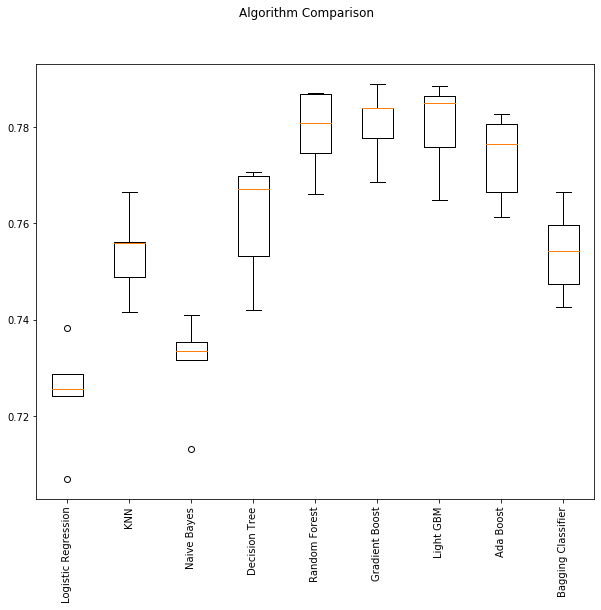

In [362]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(predictions)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

**Comaparing models with low variance error parameters** 

In [363]:

models=[]
models.append(('Logistic Regression',LogisticRegression(C=0.0001,penalty='l1',class_weight='balanced',
                                                        solver='liblinear',random_state=1)))
models.append(('KNN',KNeighborsClassifier(metric='manhattan', n_neighbors= 80, weights= 'distance')))
models.append(('Naive Bayes',GaussianNB()))
models.append(('Decision Tree',DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_leaf= 65,
                                                      min_samples_split=25,random_state=1,class_weight='balanced')))
models.append(('Random Forest',RandomForestClassifier(criterion='entropy', max_depth=9,max_features=2,
                                                      min_samples_leaf=17,min_samples_split=3,n_estimators=106,
                                                      random_state=1,class_weight='balanced')))                    
models.append(('Gradient Boost',GradientBoostingClassifier(n_estimators=120,random_state=1)))
models.append(('Light GBM',LGBMClassifier(n_estimators=43,random_state=1)))
models.append(('Ada Boost',AdaBoostClassifier(n_estimators=44,random_state=1)))
models.append(('Bagging Classifier',BaggingClassifier(n_estimators=99,random_state=1)))

In [365]:
# Evaluating Each model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
score = []
bias_error = []
var_error = []

for name,model in models:
    fold=KFold(shuffle=True,n_splits=5,random_state=1)
    if name=='Logistic Regression' or name=='KNN' or name=='Naive Bayes' or name=='SVC':
        result=cross_val_score(model,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
    else:
        result=cross_val_score(model,X_train,y_train,cv=fold,scoring='roc_auc')
    predictions.append(result)
    names.append(name)
    score.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [366]:
acc_df = pd.DataFrame({'AUC Score':score,'Bias Error':bias_error,'Variance Error':var_error},index=names)

acc_df

,AUC Score,Bias Error,Variance Error
Logistic Regression,0.500000,0.500000,0.000000
KNN,0.749636,0.250364,0.000060
Naive Bayes,0.730977,0.269023,0.000110
Decision Tree,0.747712,0.252288,0.000084
Random Forest,0.776266,0.223734,0.000066
Gradient Boost,0.780538,0.219462,0.000060
Light GBM,0.779778,0.220222,0.000097
Ada Boost,0.772934,0.227066,0.000067
Bagging Classifier,0.753995,0.246005,0.000082


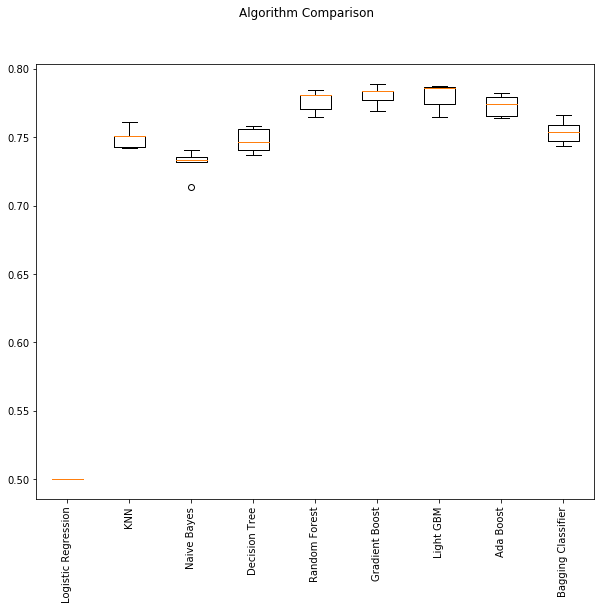

In [367]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(predictions)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

By comparing both the results of min bias parameters and min variance parameters we have selected the following models-
1. Gradient Boost (low bias error)
2. Light GBM (low bias error)
3. Random Forest (low variance error)

As we can see that model accuracy of above models are almost similar to each other so now we apply voting classifier using above 3 models. And compare there result with each respective model.

In [34]:
rf = RandomForestClassifier(criterion='entropy', max_depth=9,max_features=2,
                            min_samples_leaf=17,min_samples_split=3,n_estimators=106,
                            random_state=1,class_weight='balanced')
gboost = GradientBoostingClassifier(n_estimators=125,random_state=1)
lgbm = LGBMClassifier(n_estimators=31,random_state=1,class_weight='balanced')
voting = VotingClassifier(estimators=[('rf', rf),('lgbm', lgbm),('gboost', gboost)],voting='soft') 

In [350]:
models=[]
models.append(('Gradient Boost',gboost))
models.append(('Light GBM',lgbm))

models.append(('Random Forest',rf))                    
models.append(('Voting Classifier',voting))

In [351]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
score = []
bias_error = []
var_error = []

for name,model in models:
    fold=KFold(shuffle=True,n_splits=5,random_state=1)
    result=cross_val_score(model,X_train,y_train,cv=fold,scoring='roc_auc')
    predictions.append(result)
    names.append(name)
    score.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [352]:
acc_df = pd.DataFrame({'AUC Score':score,'Bias Error':bias_error,'Variance Error':var_error},index=names)

acc_df

,AUC Score,Bias Error,Variance Error
Gradient Boost,0.780612,0.219388,0.000061
Light GBM,0.779922,0.220078,0.000069
Random Forest,0.776266,0.223734,0.000066
Voting Classifier,0.782546,0.217454,0.000071


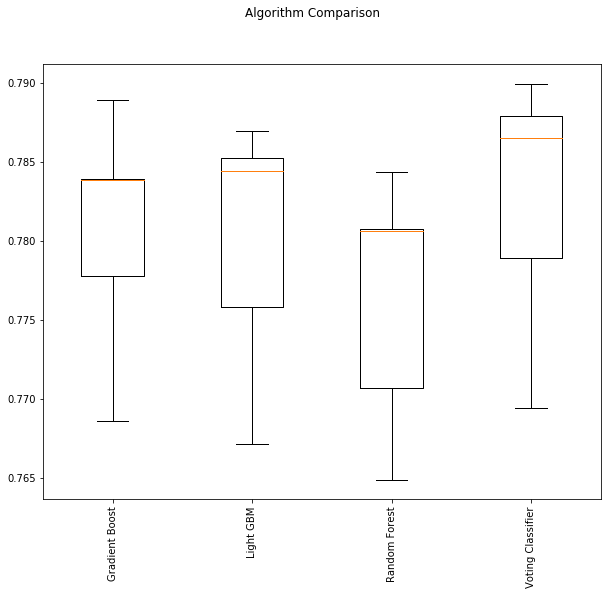

In [353]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(predictions)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

In [354]:
gboost.fit(X_train,y_train)
lgbm.fit(X_train,y_train)
rf.fit(X_train,y_train)
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=9,
                                                     max_features=2,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=17,
                                                     min_samples_split=3,
                                                     min_weight_fraction_leaf=0.0,
      

In [355]:
eval_metrics(gboost,X_test,y_test)

Test Data
Confusion Matrix:
 [[6653  356]
 [1278  713]]
Accuracy of Test: 0.8184444444444444
AUC of Test: 0.7788114714245206
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [356]:
eval_metrics(lgbm,X_test,y_test)

Test Data
Confusion Matrix:
 [[5513 1496]
 [ 721 1270]]
Accuracy of Test: 0.7536666666666667
AUC of Test: 0.779233365668407
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      7009
           1       0.46      0.64      0.53      1991

    accuracy                           0.75      9000
   macro avg       0.67      0.71      0.68      9000
weighted avg       0.79      0.75      0.77      9000



In [357]:
eval_metrics(rf,X_test,y_test)

Test Data
Confusion Matrix:
 [[5656 1353]
 [ 765 1226]]
Accuracy of Test: 0.7646666666666667
AUC of Test: 0.7758930739762804
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      7009
           1       0.48      0.62      0.54      1991

    accuracy                           0.76      9000
   macro avg       0.68      0.71      0.69      9000
weighted avg       0.79      0.76      0.77      9000



In [358]:
eval_metrics(voting,X_test,y_test)

Test Data
Confusion Matrix:
 [[6197  812]
 [ 946 1045]]
Accuracy of Test: 0.8046666666666666
AUC of Test: 0.7811034589308615
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      7009
           1       0.56      0.52      0.54      1991

    accuracy                           0.80      9000
   macro avg       0.72      0.70      0.71      9000
weighted avg       0.80      0.80      0.80      9000



Comparing the scores of all models on test data we can see voting classifier is out performing all the other models.
With 80.46% accuracy and auc score of 78.11%. Here we are more concern about auc score as our target is partial imbalance so 77% accuracy is not a big deal in this case.
